# Lecture 4: Introduction to Regression 
### Data Science 1: CS 109A/STAT 121A/AC 209A/ E 109A <br> Instructors: Pavlos Protopapas, Kevin Rader, Rahul Dave, Margo Levine
#### Harvard University <br> Fall 2017 <br> 

---


In [15]:
import pandas as pd
import sys
import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
sns.set(style="ticks")
%matplotlib inline

import seaborn as sns
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)

sns.set_context('poster')
# import matplotlib.pylab as pylab
# params = {'legend.fontsize': 'large',
#           'figure.figsize': (15, 5),
#          'axes.labelsize': 'large',
#          'axes.titlesize':'large',
#          'xtick.labelsize':'large',
#          'ytick.labelsize':'large'}
# pylab.rcParams.update(params)}

## Step #1: Load and Explore Data

In [16]:
# GET THE FULL DATA SET FROM 
#https://drive.google.com/file/d/0B28c493CP9GtRHFVM0U0SVI2Yms/view?usp=sharing
nyc_cab_df = pd.read_csv('data/nyc_car_hire_data.csv', low_memory=False) # DO WE NEED THE LOW MEMORY 

In [64]:
nyc_cab_df.shape

(1873671, 30)

In [18]:
nyc_cab_df.head(100)

,AWND,Base,Day,Dropoff_latitude,Dropoff_longitude,Ehail_fee,Extra,Fare_amount,Lpep_dropoff_datetime,MTA_tax,PRCP,Passenger_count,Payment_type,Pickup_latitude,Pickup_longitude,RateCodeID,SNOW,SNWD,Store_and_fwd_flag,TMAX,TMIN,Tip_amount,Tolls_amount,Total_amount,Trip_distance,Trip_type,Type,VendorID,lpep_pickup_datetime,Trip Length (min)
0,4.7,B02512,1,NaN,NaN,NaN,NaN,33.863498,2014-04-01 00:24:00,NaN,0.0,NaN,NaN,40.7690,-73.9549,NaN,0.0,0.0,NaN,60,39,NaN,NaN,NaN,4.083561,NaN,1,NaN,2014-04-01 00:11:00,13.0
1,4.7,B02512,1,NaN,NaN,NaN,NaN,19.022892,2014-04-01 00:29:00,NaN,0.0,NaN,NaN,40.7267,-74.0345,NaN,0.0,0.0,NaN,60,39,NaN,NaN,NaN,3.605694,NaN,1,NaN,2014-04-01 00:17:00,12.0
2,4.7,B02512,1,NaN,NaN,NaN,NaN,25.498981,2014-04-01 00:34:00,NaN,0.0,NaN,NaN,40.7316,-73.9873,NaN,0.0,0.0,NaN,60,39,NaN,NaN,NaN,4.221763,NaN,1,NaN,2014-04-01 00:21:00,13.0
3,4.7,B02512,1,NaN,NaN,NaN,NaN,28.024628,2014-04-01 00:39:00,NaN,0.0,NaN,NaN,40.7588,-73.9776,NaN,0.0,0.0,NaN,60,39,NaN,NaN,NaN,2.955510,NaN,1,NaN,2014-04-01 00:28:00,11.0
4,4.7,B02512,1,NaN,NaN,NaN,NaN,12.083589,2014-04-01 00:40:00,NaN,0.0,NaN,NaN,40.7594,-73.9722,NaN,0.0,0.0,NaN,60,39,NaN,NaN,NaN,1.922292,NaN,1,NaN,2014-04-01 00:33:00,7.0
5,4.7,B02512,1,NaN,NaN,NaN,NaN,21.474723,2014-04-01 00:42:00,NaN,0.0,NaN,NaN,40.7383,-74.0403,NaN,0.0,0.0,NaN,60,39,NaN,NaN,NaN,2.627013,NaN,1,NaN,2014-04-01 00:33:00,9.0
6,4.7,B02512,1,NaN,NaN,NaN,NaN,14.242408,2014-04-01 00:44:00,NaN,0.0,NaN,NaN,40.7223,-73.9887,NaN,0.0,0.0,NaN,60,39,NaN,NaN,NaN,1.505820,NaN,1,NaN,2014-04-01 00:39:00,5.0
7,4.7,B02512,1,NaN,NaN,NaN,NaN,21.859079,2014-04-01 00:55:00,NaN,0.0,NaN,NaN,40.7620,-73.9790,NaN,0.0,0.0,NaN,60,39,NaN,NaN,NaN,2.766684,NaN,1,NaN,2014-04-01 00:45:00,10.0
8,4.7,B02512,1,NaN,NaN,NaN,NaN,17.489561,2014-04-01 01:06:00,NaN,0.0,NaN,NaN,40.7524,-73.9960,NaN,0.0,0.0,NaN,60,39,NaN,NaN,NaN,3.423024,NaN,1,NaN,2014-04-01 00:55:00,11.0
9,4.7,B02512,1,NaN,NaN,NaN,NaN,11.976072,2014-04-01 01:11:00,NaN,0.0,NaN,NaN,40.7575,-73.9846,NaN,0.0,0.0,NaN,60,39,NaN,NaN,NaN,3.080852,NaN,1,NaN,2014-04-01 01:01:00,10.0


In [19]:
nyc_cab_df.describe()

,AWND,Day,Dropoff_latitude,Dropoff_longitude,Ehail_fee,Extra,Fare_amount,MTA_tax,PRCP,Passenger_count,Payment_type,Pickup_latitude,Pickup_longitude,RateCodeID,SNOW,SNWD,TMAX,TMIN,Tip_amount,Tolls_amount,Total_amount,Trip_distance,Trip_type,Type,VendorID,Trip Length (min)
count,1.873671e+06,1.873671e+06,1.309155e+06,1.309155e+06,0.0,1.309155e+06,1.873671e+06,1.309155e+06,1.873671e+06,1.309155e+06,1.309155e+06,1.873671e+06,1.873671e+06,1.309155e+06,1873671.0,1873671.0,1.873671e+06,1.873671e+06,1.309155e+06,1.309155e+06,1.309155e+06,1.873671e+06,1.225061e+06,1.873671e+06,1.309155e+06,1.873671e+06
mean,6.349472e+00,1.573272e+01,4.069035e+01,-7.380999e+01,NaN,3.718944e-01,1.480038e+01,4.885869e-01,3.277113e-01,1.424879e+00,1.613783e+00,4.070361e+01,-7.385354e+01,1.096059e+00,0.0,0.0,6.094607e+01,4.334624e+01,1.013024e+00,1.069806e-01,1.432070e+01,2.917737e+00,1.020388e+00,3.012888e-01,1.781165e+00,1.132344e+01
std,1.782350e+00,8.786914e+00,1.653301e+00,2.997829e+00,NaN,3.705219e-01,9.899925e+00,7.478954e-02,1.033659e+00,1.129275e+00,5.014897e-01,1.435388e+00,2.603334e+00,6.177816e-01,0.0,0.0,8.434375e+00,6.049009e+00,2.219229e+00,8.479594e-01,1.138924e+01,2.529476e+00,1.413220e-01,4.588180e-01,4.134567e-01,7.875921e+00
min,2.000000e+00,1.000000e+00,0.000000e+00,-1.219265e+02,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-4.075827e+01,-1.219263e+02,1.000000e+00,0.0,0.0,4.700000e+01,3.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,-3.483963e-01,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,4.900000e+00,8.000000e+00,4.071491e+01,-7.396558e+01,NaN,0.000000e+00,7.500000e+00,5.000000e-01,0.000000e+00,1.000000e+00,1.000000e+00,4.071750e+01,-7.397948e+01,1.000000e+00,0.0,0.0,5.400000e+01,4.000000e+01,0.000000e+00,0.000000e+00,7.500000e+00,1.340000e+00,1.000000e+00,0.000000e+00,2.000000e+00,6.000000e+00
50%,6.000000e+00,1.600000e+01,4.075613e+01,-7.394200e+01,NaN,5.000000e-01,1.300000e+01,5.000000e-01,0.000000e+00,1.000000e+00,2.000000e+00,4.074918e+01,-7.395300e+01,1.000000e+00,0.0,0.0,6.100000e+01,4.300000e+01,0.000000e+00,0.000000e+00,1.100000e+01,2.330000e+00,1.000000e+00,0.000000e+00,2.000000e+00,1.000000e+01
75%,8.300000e+00,2.400000e+01,4.080378e+01,-7.390412e+01,NaN,5.000000e-01,2.037272e+01,5.000000e-01,7.000000e-02,1.000000e+00,2.000000e+00,4.079704e+01,-7.392220e+01,1.000000e+00,0.0,0.0,6.700000e+01,4.600000e+01,1.500000e+00,0.000000e+00,1.750000e+01,3.640000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.400000e+01
max,9.400000e+00,3.000000e+01,4.289498e+01,0.000000e+00,NaN,3.000000e+01,3.351000e+03,1.500000e+00,4.970000e+00,9.000000e+00,5.000000e+00,4.211660e+01,7.393764e+01,9.900000e+01,0.0,0.0,7.700000e+01,5.900000e+01,5.000000e+02,1.500000e+02,3.352500e+03,2.313600e+02,2.000000e+00,1.000000e+00,2.000000e+00,5.900000e+01


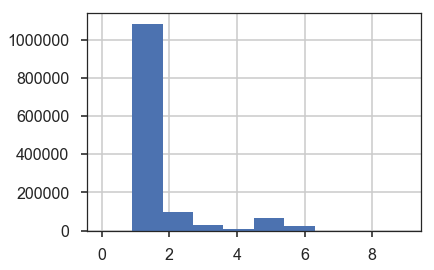

In [20]:
nyc_cab_df.Passenger_count.hist()

In [21]:
nyc_cab_df.dtypes

AWND                     float64
Base                      object
Day                        int64
Dropoff_latitude         float64
Dropoff_longitude        float64
Ehail_fee                float64
Extra                    float64
Fare_amount              float64
Lpep_dropoff_datetime     object
MTA_tax                  float64
PRCP                     float64
Passenger_count          float64
Payment_type             float64
Pickup_latitude          float64
Pickup_longitude         float64
RateCodeID               float64
SNOW                     float64
SNWD                     float64
Store_and_fwd_flag        object
TMAX                       int64
TMIN                       int64
Tip_amount               float64
Tolls_amount             float64
Total_amount             float64
Trip_distance            float64
Trip_type                float64
Type                       int64
VendorID                 float64
lpep_pickup_datetime      object
Trip Length (min)        float64
dtype: obj

In [22]:
nyc_cab_df.columns

Index(['AWND', 'Base', 'Day', 'Dropoff_latitude', 'Dropoff_longitude', 'Ehail_fee', 'Extra', 'Fare_amount', 'Lpep_dropoff_datetime', 'MTA_tax', 'PRCP', 'Passenger_count', 'Payment_type', 'Pickup_latitude', 'Pickup_longitude', 'RateCodeID', 'SNOW', 'SNWD', 'Store_and_fwd_flag', 'TMAX', 'TMIN', 'Tip_amount', 'Tolls_amount', 'Total_amount', 'Trip_distance', 'Trip_type', 'Type', 'VendorID', 'lpep_pickup_datetime', 'Trip Length (min)'], dtype='object')

## Clean data

How would you clean the data? 
* Extreme/outliers 
* Impute missing values 
* Drop some columns? 
* Drop rows with problematic values 

In [23]:
nyc_cab_sample = nyc_cab_df.sample(n=1000, random_state=6)
fares = nyc_cab_sample['Fare_amount'].values
trip_lengths = nyc_cab_sample['Trip Length (min)'].values
print(type(fares), type(trip_lengths))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


Text(0.5,1,'NYC Care Hire Data:\n Trip Duration vs Fare Scatter Plot')

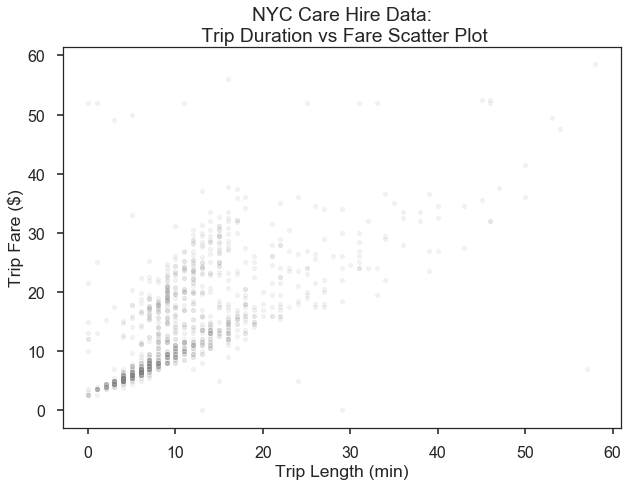

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))


ax.scatter(trip_lengths, fares, color='gray', alpha=0.1, s=20)

ax.set_xlabel('Trip Length (min)')
ax.set_ylabel('Trip Fare ($)')
ax.set_title('NYC Care Hire Data:\n Trip Duration vs Fare Scatter Plot')



## Step #2: Modeling the Data

In [35]:
#nyc_cab_sample = nyc_cab_df.sample(n=1000, random_state=1)

y = nyc_cab_sample['Fare_amount'].values
X = nyc_cab_sample[['Trip Length (min)']].values
X.shape

(1000, 1)

In [38]:
regression = LinearRegression(fit_intercept=True)
regression.fit(X, y)



# this is the estimated statistical model (f_hat) using the predicted coefficients 
regression_line = lambda x: regression.intercept_ + regression.coef_ * x
print('The estimated equation of the regression line is: {} + {} * x'.format(regression.intercept_, regression.coef_[0]))

The estimated equation of the regression line is: 6.585636707686284 + 0.7331691319407916 * x


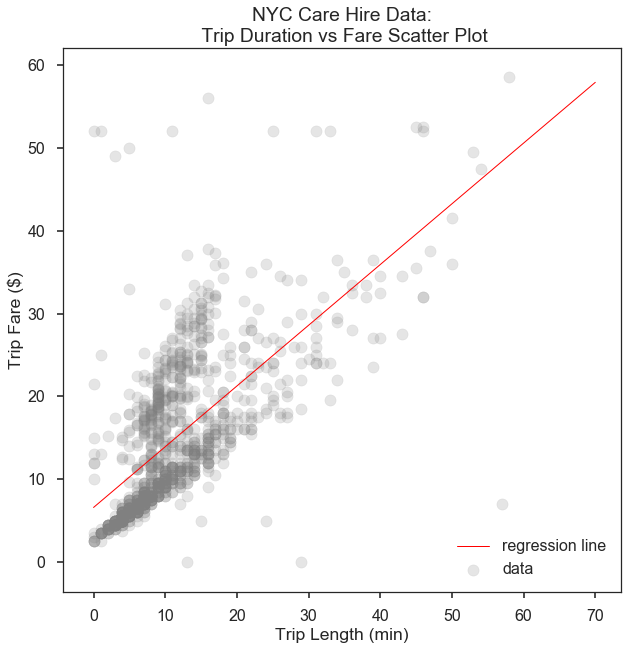

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

x_vals = np.linspace(0, 70, 100)
ax.plot(x_vals, regression_line(x_vals), color='red', linewidth=1.0, label='regression line')
ax.scatter(X, y, color='gray', alpha=0.2, label='data')



ax.set_xlabel('Trip Length (min)')
ax.set_ylabel('Trip Fare ($)')
ax.set_title('NYC Care Hire Data:\n Trip Duration vs Fare Scatter Plot')
ax.legend(loc='best')



---

## Step #3: Evaluate and Interpret the Model

### 1. Train vs Test Error

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=6)
print(len(X_train), len(X_test))
train_MSE= np.mean((y_train - regression.predict(X_train))**2)
test_MSE= np.mean((y_test - regression.predict(X_test))**2)
print('The train MSE is {}, the test MSE is {}'.format(train_MSE, test_MSE))

670 330
The train MSE is 48.59886786981504, the test MSE is 52.1996663723951


Why is the MSE for test higher? 

### 2. Uncertainty in the Model Parameter Estimates

In [42]:
def find_regression_params(regression_model, samples):
    # randomly select number of samples from the big data
    nyc_cab_sample = nyc_cab_df.sample(n=samples)

    y = nyc_cab_sample['Fare_amount'].values
    X = nyc_cab_sample[['Trip Length (min)']].values

   

    regression_model.fit(X, y)
    
    return regression_model.intercept_, regression_model.coef_[0]

In [43]:
regression_model = LinearRegression(fit_intercept=True)

total_draws = 500
samples = 1000
regression_params = []

for i in range(total_draws):
    if i % 10 == 0:
        out = i * 1. / total_draws * 100
        sys.stdout.write("\r%d%%" % out)
        sys.stdout.flush()
        
    regression_params.append(find_regression_params(regression_model, samples))
    
sys.stdout.write("\r%d%%" % 100)
regression_params = np.array(regression_params)

100%

In [52]:
regression_params

array([[ 6.64801549,  0.72891001],
       [ 6.29018643,  0.71866907],
       [ 6.01706821,  0.74381628],
       [ 6.29104092,  0.74753889],
       [ 7.22227053,  0.68446529],
       [ 5.72862088,  0.78991621],
       [ 6.09572049,  0.74950536],
       [ 5.67517529,  0.82115604],
       [ 6.43098394,  0.72557557],
       [ 5.99182416,  0.76447282],
       [ 6.2017225 ,  0.74331024],
       [ 5.80613172,  0.77642242],
       [ 6.59965965,  0.7473171 ],
       [ 6.38817354,  0.73037565],
       [ 6.39110059,  0.76238378],
       [ 5.81591331,  0.78647779],
       [ 5.13818827,  0.83474253],
       [ 6.4435686 ,  0.71605085],
       [ 5.32903768,  0.86048835],
       [ 6.55693027,  0.7530418 ],
       [ 7.12267519,  0.70744402],
       [ 5.9440319 ,  0.80449663],
       [ 5.81053811,  0.78239516],
       [ 6.13210216,  0.75789244],
       [ 6.0283736 ,  0.76030212],
       [ 6.04161915,  0.81671734],
       [ 6.20907269,  0.71276072],
       [ 6.31151319,  0.75337083],
       [ 6.77473688,

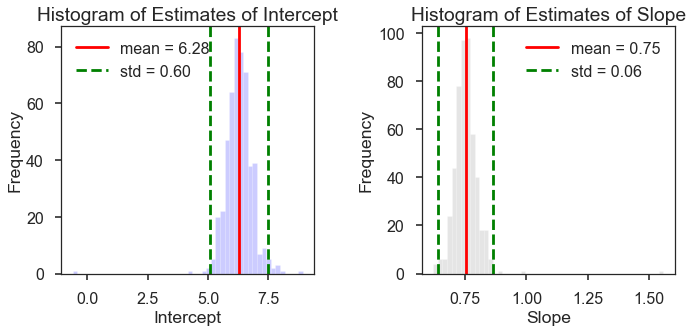

In [53]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].hist(regression_params[:, 0], bins=50, color='blue', edgecolor='white', linewidth=1, alpha=0.2)
ax[0].axvline(x=regression_params[:, 0].mean(), color='red', label='mean = {0:.2f}'.format(regression_params[:, 0].mean()))
ax[0].axvline(x=regression_params[:, 0].mean() - 2 * regression_params[:, 0].std(), color='green', linestyle='--', label='std = {0:.2f}'.format(regression_params[:, 0].std()))
ax[0].axvline(x=regression_params[:, 0].mean() + 2 * regression_params[:, 0].std(), color='green', linestyle='--')

ax[0].set_xlabel('Intercept')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Histogram of Estimates of Intercept')
ax[0].legend(loc='best')


ax[1].hist(regression_params[:, 1], bins=50, color='gray', edgecolor='white', linewidth=1, alpha=0.2)
ax[1].axvline(x=regression_params[:, 1].mean(), color='red', label='mean = {0:.2f}'.format(regression_params[:, 1].mean()))
ax[1].axvline(x=regression_params[:, 1].mean() - 2 * regression_params[:, 1].std(), color='green', linestyle='--', label='std = {0:.2f}'.format(regression_params[:, 1].std()))
ax[1].axvline(x=regression_params[:, 1].mean() + 2 * regression_params[:, 1].std(), color='green', linestyle='--')

ax[1].set_xlabel('Slope')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Histogram of Estimates of Slope')
ax[1].legend(loc='best')

plt.tight_layout()


### 3. The Effect of Sample Size on Uncertainty

In [54]:
regression_model = LinearRegression(fit_intercept=True)

def compute_SE(total_draws, samples, regression_model):

    regression_params = []

    for i in range(total_draws):
        regression_params.append(find_regression_params(regression_model, samples))

    regression_params = np.array(regression_params)
    return np.std(regression_params[:, 0]), np.std(regression_params[:, 1])

total_draws = 100
samples = range(100, 10001, 900)
ses = []

for i in range(len(samples)):
    out = i * 1. / len(samples) * 100
    sys.stdout.write("\r%d%%" % out)
    sys.stdout.flush()
    ses.append(compute_SE(total_draws, samples[i], regression_model))

sys.stdout.write("\r%d%%" % 100)

100%

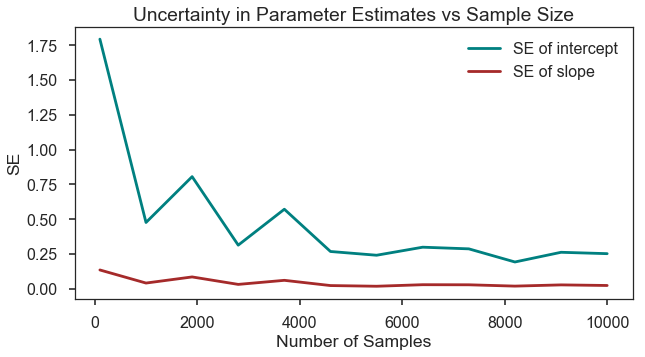

In [55]:
ses = np.array(ses)
    
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

ax.plot(samples, ses[:, 0], color='teal', label='SE of intercept')
ax.plot(samples, ses[:, 1], color='brown', label='SE of slope')

ax.set_xlabel('Number of Samples')
ax.set_ylabel('SE')
ax.set_title('Uncertainty in Parameter Estimates vs Sample Size')
ax.legend(loc='best')


---

## Step 2: Consider a Different Model for the Data - kNN

In [56]:
nyc_cab_sample = nyc_cab_df.sample(n=1000, random_state=1)

y = nyc_cab_sample['Fare_amount'].values
X = nyc_cab_sample[['Trip Length (min)']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [57]:
knn_model = KNeighborsRegressor(n_neighbors=2)
knn_model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=2, p=2,
          weights='uniform')

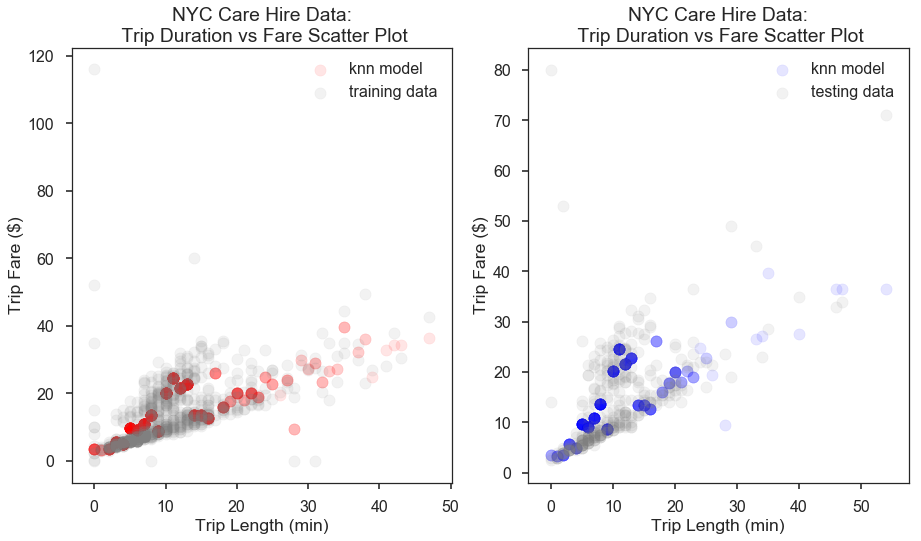

In [59]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))
ax[0].scatter(X_train, knn_model.predict(X_train), color='red', alpha=0.1, label='knn model')
ax[0].scatter(X_train, y_train, color='gray', alpha=0.1, label='training data')


ax[0].set_xlabel('Trip Length (min)')
ax[0].set_ylabel('Trip Fare ($)')
ax[0].set_title('NYC Care Hire Data:\n Trip Duration vs Fare Scatter Plot')
ax[0].legend(loc='best')

ax[1].scatter(X_test, knn_model.predict(X_test), color='blue', alpha=0.1, label='knn model')
ax[1].scatter(X_test, y_test, color='gray', alpha=0.1, label='testing data')

ax[1].set_xlabel('Trip Length (min)')
ax[1].set_ylabel('Trip Fare ($)')
ax[1].set_title('NYC Care Hire Data:\n Trip Duration vs Fare Scatter Plot')
ax[1].legend(loc='best')



In [60]:
train_MSE= np.mean((y_train - knn_model.predict(X_train))**2)
test_MSE= np.mean((y_test - knn_model.predict(X_test))**2)

print('The train MSE is {}, the test MSE is {}'.format(train_MSE, test_MSE))

The train MSE is 70.9224876379618, the test MSE is 77.62695077723178


---

## Step #3: Evaluate and Interpret the kNN Model

In [61]:
train_MSEs = []
test_MSEs = []

for k in range(1, 100):
    sys.stdout.write("\r%d%%" % k)
    sys.stdout.flush()
    
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    train_MSEs.append(np.mean((y_train - knn_model.predict(X_train))**2))
    test_MSEs.append(np.mean((y_test - knn_model.predict(X_test))**2))
    
sys.stdout.write("\r%d%%" % 100)

100%

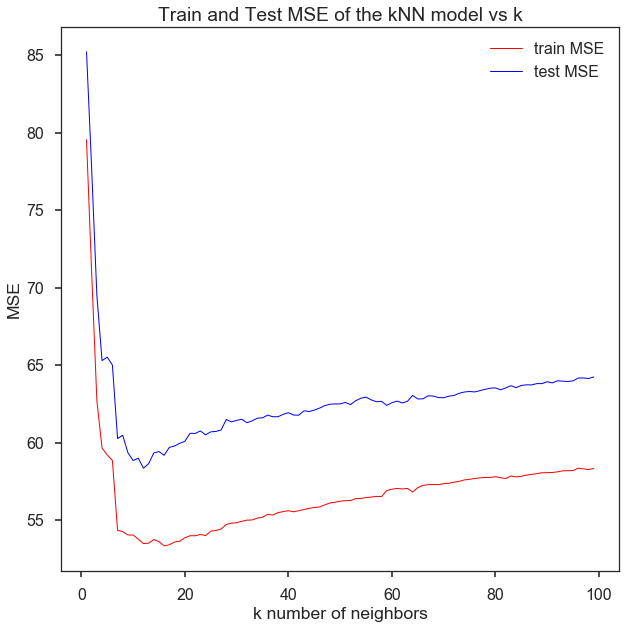

In [63]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

ax.plot(range(1, 100), train_MSEs, color='red', linewidth=1.0, label='train MSE')
ax.plot(range(1, 100), test_MSEs, color='blue', linewidth=1.0, label='test MSE')


ax.set_xlabel('k number of neighbors')
ax.set_ylabel('MSE')
ax.set_title('Train and Test MSE of the kNN model vs k')
ax.legend(loc='best');

